In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from IPython.display import HTML, Image

%matplotlib inline
sns.set()

from sklearn.datasets import make_circles

In [2]:
def feature_map_1(X):
    return np.asarray((X[:,0], X[:,1], X[:,0]**2 + X[:,1]**2)).T

In [3]:
#Generate dataset and feature-map
X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_1(X)

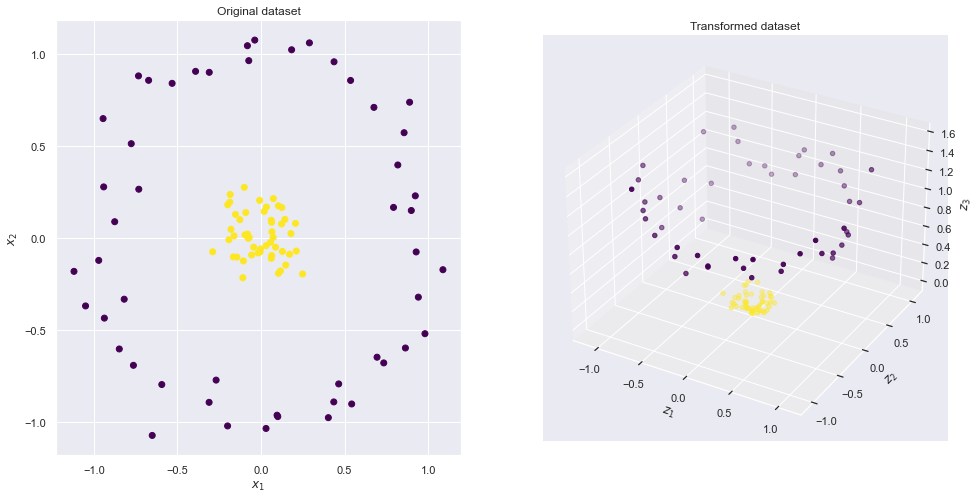

In [4]:
#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')
plt.show()

In [5]:
def feature_map_2(X):  
    return np.asarray((X[:,0], X[:,1], np.exp( -( X[:,0]**2 + X[:,1]**2)))).T

In [6]:
X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_2(X)

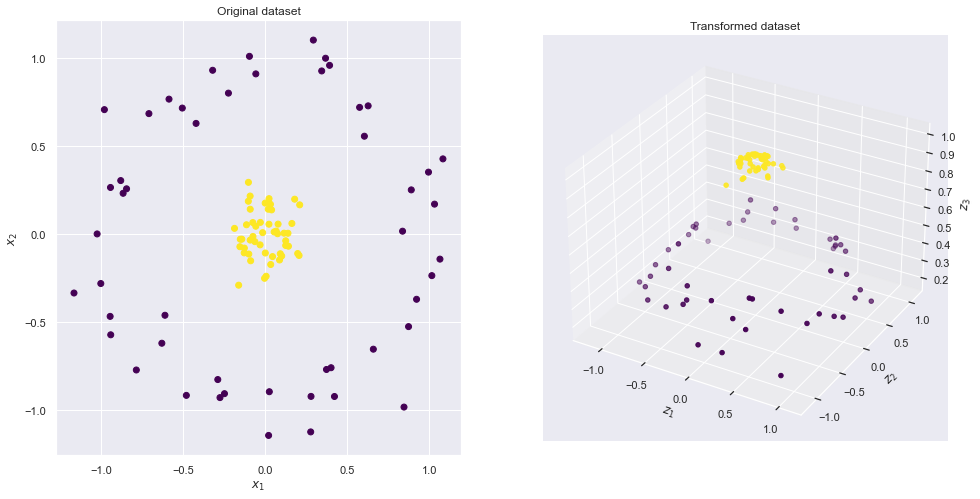

In [7]:
#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')
plt.show()

In [8]:
def feature_map_3(X):  
    return np.asarray(( np.sqrt(2) *X[:,0] * X[:,1], X[:,0]**2, X[:,1]**2)).T

In [9]:
from sklearn import svm
X, y = make_circles(100, factor=.1, noise=.1, random_state = 0)
Z = feature_map_3(X)

w= [-0.05481854 -2.53191791 -2.52028513] b= [1.14976292]


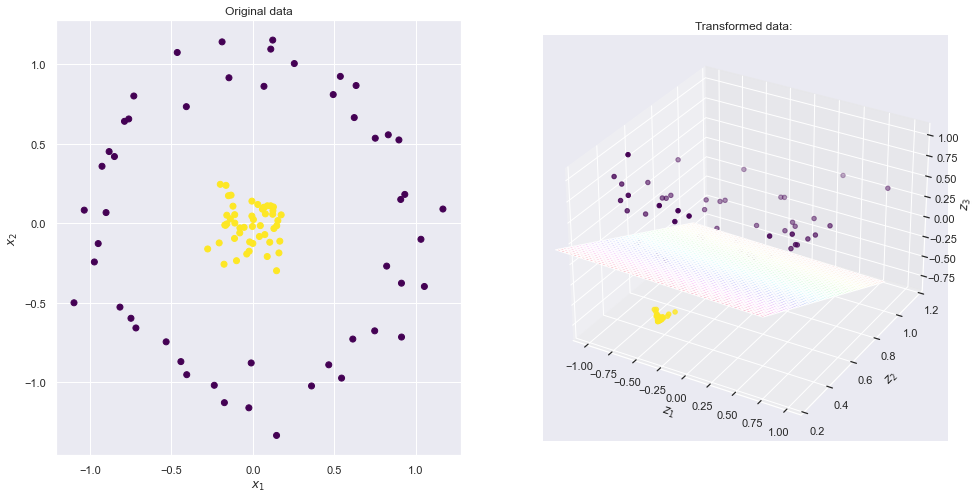

In [10]:
#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original data')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed data: ')

#SVM using kernel 3 - feature map 3
clf = svm.SVC(C = 1, kernel = 'linear')
clf.fit(Z, y) 

w = clf.coef_.flatten()
b = clf.intercept_.flatten()
print('w=',w,'b=',b)

# create x,y
xx, yy = np.meshgrid(np.linspace(-1,1), np.linspace(0,1))

# calculate corresponding z
boundary = (-w[0] * xx - w[1] * yy - b) * 1. /w[2]


# plot the surface

ax.plot_surface(xx, yy, boundary, alpha = .3, cmap='hsv')
ax.set_ylim(.2,1.2)
ax.set_zlim(-.9,1.1)
#ax.view_init(0, 260)

plt.show()